In [1]:
import sys
import os
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def visualize_image(image, title=None):
    """
    可視化のための画像を表示する関数。
    
    パラメータ:
        image: numpy配列またはtorch.Tensor (C, H, W)
        title: 表示するタイトル（オプション）
    """
    # torch.Tensorの場合numpy配列に変換
    if isinstance(image, torch.Tensor):
        image = image.detach().cpu().numpy()
    
    # (C, H, W) -> (H, W, C) に変換
    if image.shape[0] == 3:  # チャンネル数が先頭の場合
        image = np.transpose(image, (1, 2, 0))
    
    # データをクリップ (特にtorchの可能性を考慮して)
    
    # 可視化
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

In [3]:
yaml_path = "data.yaml"

In [4]:
from modules.utils.fetch import fetch_data_module
from omegaconf import OmegaConf

config = OmegaConf.load(yaml_path)
data_module = fetch_data_module(config=config)
data_module.setup("test")

Using python-based detection evaluation
[Eval] Using streaming dataset. This is not recommended for training because it is slower and
ckpt 1


creating streaming test datasets: 120it [00:00, 717.00it/s]

ckpt 12
num_full_sequences=120
num_splits=0
num_split_sequences=0


In [5]:
test_dataloader = data_module.test_dataloader()

In [6]:
from data.utils.types import DataType
from utils.padding import InputPadderFromShape

data_iter = iter(test_dataloader)
data = next(data_iter)["data"]

input_padder = InputPadderFromShape(desired_hw=data[DataType.EV_REPR][0].shape[2:4])

ev_tensor_sequence = data[DataType.EV_REPR]
sparse_obj_labels = data[DataType.OBJLABELS_SEQ]
is_first_sample = data[DataType.IS_FIRST_SAMPLE]
token_mask_sequence = data.get(DataType.TOKEN_MASK, None)


sequence_len = len(ev_tensor_sequence)


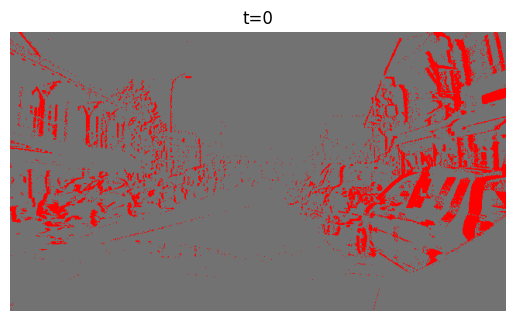

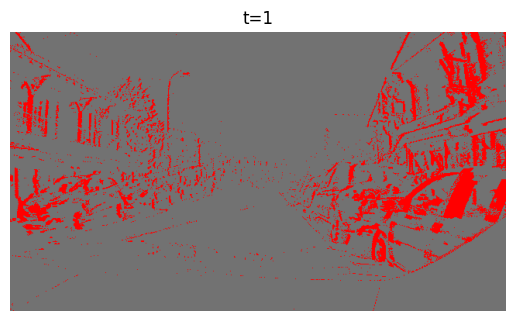

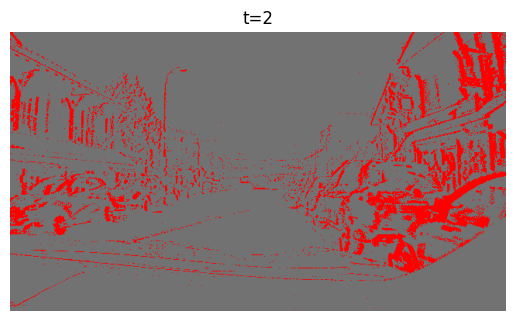

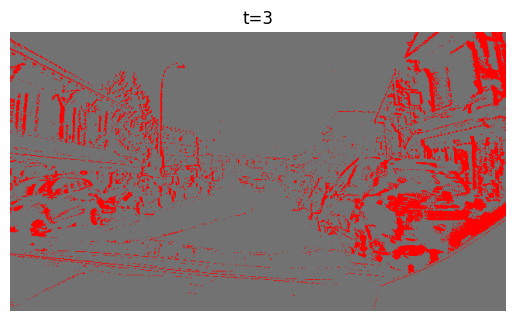

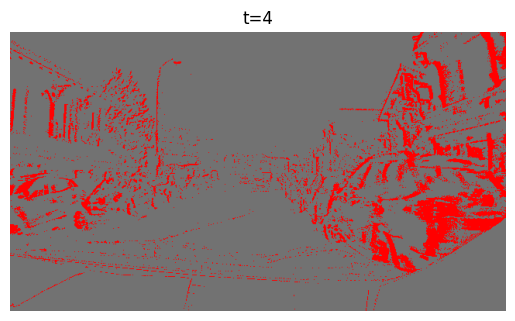

In [7]:
for tidx in range(sequence_len):
    ev_tensors = ev_tensor_sequence[tidx]
    
    ev_tensors = input_padder.pad_tensor_ev_repr(ev_tensors)

    visualize_image(ev_tensors.squeeze(0), title=f"t={tidx}")